In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
x = df.iloc[:, 1:8] 
y = df.iloc[:, 8]     

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [7]:
#SVR
from sklearn import svm
clf = svm.SVR(gamma='auto')
clf.fit(x_train, y_train)
label=[]
accuracy=[]
label.append('SVR')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.5806566895878906


In [8]:
from sklearn import linear_model
clf = linear_model.Ridge(alpha=.5)
clf.fit(x_train, y_train)
label.append('Ridge')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.8515567995762389


In [9]:
clf = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3)
clf.fit(x_train, y_train)
label.append('RidgeCV')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.8512521441517968


In [10]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train, y_train)
label.append('Lasso')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.7203383100952421


In [11]:
clf = linear_model.BayesianRidge()
clf.fit(x_train, y_train)
label.append('BayesianRidge')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.8522931038897713


In [58]:
clf = linear_model.ARDRegression()
clf.fit(x_train, y_train)
label.append('ARDRegression')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.797977463614865


In [12]:
clf = linear_model.TheilSenRegressor()
clf.fit(x_train, y_train)
label.append('TheilSenRegressor')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.8441959747672716


In [13]:
clf.predict(x_test[10:20])

array([0.54583434, 0.67067748, 0.9544117 , 0.52631215, 0.88439036,
       0.74320586, 0.97054875, 0.74065638, 0.78346611, 0.57179593])

In [14]:
y_test[15:25]

127    0.78
213    0.96
303    0.73
242    0.70
317    0.58
440    0.53
338    0.81
288    0.82
225    0.61
229    0.82
Name: Chance of Admit , dtype: float64

In [15]:
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(len(label))
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, accuracy)
    plt.xlabel('Model', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=90)
    plt.title('Accuracy of different models')
    plt.savefig("model_accuracy.png")
    plt.show()

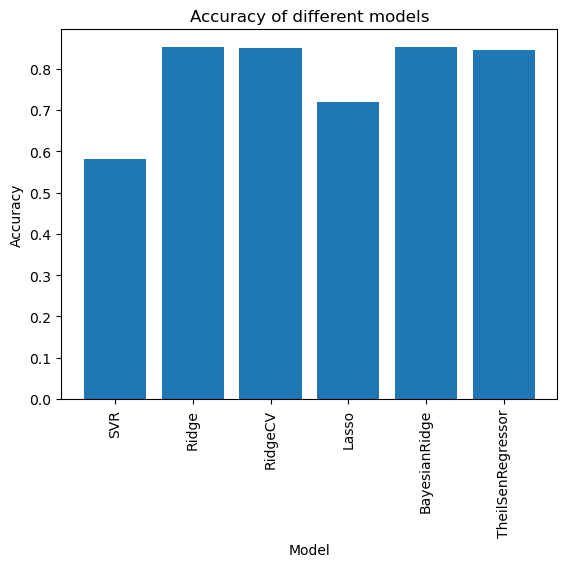

In [16]:
plot_bar_x()